In [41]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_rel

In [42]:

def getTestDataset(name):
    if name == 'mnist':

        test_data_dir = 'test'
        image_files = os.listdir(test_data_dir)
        test_images = []
        test_labels = []
        for image_file in image_files:
            if '.png' not in image_file:
                continue
            else :
                test_labels.append(int(image_file.split('_')[0]))
                test_image = cv2.imread(os.path.join(test_data_dir, image_file), cv2.IMREAD_GRAYSCALE)
                test_images.append(test_image)

        test_images = np.array(test_images, dtype='float32')
        test_labels = np.array(test_labels)
        test_images = test_images / 255
        test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
        test_labels = to_categorical(test_labels, num_classes=10)
        return test_images, test_labels
    else:
        return np.array([]), np.array([])

# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test, y_test = getTestDataset('mnist')

def getModelPredication(modelPath):

    print(f'Test data shape is {x_test.shape} and {y_test.shape}')
    model = load_model(modelPath)
    probs = model.predict(x_test)
    prediction = np.argmax(probs, axis=1)
    return prediction


In [43]:

def getFedAvgAccuracy():
    fedAvgFiles = ['/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 5st 3_5/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 10st 3_5/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 15st 3_5/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 5st/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 10st/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 15st/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 5st 3_5/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 10st 3_5/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 15st 3_5/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 5st/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 10st/avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 15st/avg/server/Models/globalMetrics.txt'
              ]
    fedAvgAccuracies = []
    for fname in fedAvgFiles:
        with open(fname, "r") as file:
            content = file.read()
            data_dict = json.loads(content)
            accuracy = data_dict['accuracy']
            accuracy = np.mean(accuracy[-5:])
            fedAvgAccuracies.append(accuracy)
    return fedAvgAccuracies

def getWeightedAvgAccuracy():
    weightedAvgFiles = ['/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 5st 3_5/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 10st 3_5/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 15st 3_5/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 5st/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 10st/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 15st/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 5st 3_5/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 10st 3_5/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 15st 3_5/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 5st/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 10st/weighted_avg/server/Models/globalMetrics.txt',
               '/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 15st/weighted_avg/server/Models/globalMetrics.txt'
               
              ]
    weightedAvgAccuracies = []
    for fname in weightedAvgFiles:
        with open(fname, "r") as file:
            content = file.read()
            data_dict = json.loads(content)
            accuracy = data_dict['accuracy']
            accuracy = np.mean(accuracy[-5:])
            weightedAvgAccuracies.append(accuracy)
    return weightedAvgAccuracies

In [44]:
fedAvgstat = getFedAvgAccuracy()
weightedAvgweighted = getWeightedAvgAccuracy()
print(fedAvgstat)
print(weightedAvgweighted)

[0.9295400023460388, 0.759280002117157, 0.7391800045967102, 0.9387600064277649, 0.9236600041389466, 0.8925599932670594, 0.7913599967956543, 0.5671800017356873, 0.5369799971580506, 0.7874600052833557, 0.6896999955177308, 0.5651800155639648]
[0.9316799998283386, 0.9235999941825866, 0.9287999987602233, 0.9389600038528443, 0.9261600136756897, 0.9203799962997437, 0.8239199995994568, 0.5781800031661988, 0.5805999994277954, 0.8328799962997436, 0.8005799889564514, 0.7111000061035156]


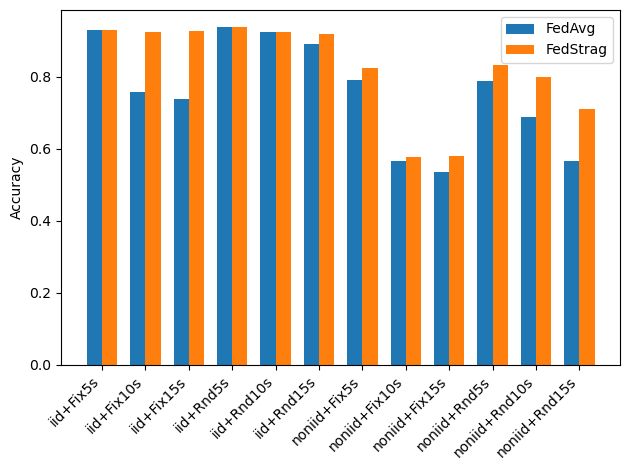

In [45]:
# Example accuracy vectors (replace these with your actual accuracy scores)
model1_accuracy = fedAvgstat
model2_accuracy = weightedAvgweighted

# Number of data points (assuming both vectors have the same length)
num_data_points = len(model1_accuracy)

# Create an array representing the index of data points (e.g., [0, 1, 2, ...])
x = range(num_data_points)
x_label = ['iid+Fix5s', 'iid+Fix10s', 'iid+Fix15s', 'iid+Rnd5s', 'iid+Rnd10s', 'iid+Rnd15s','noniid+Fix5s', 'noniid+Fix10s', 'noniid+Fix15s', 'noniid+Rnd5s', 'noniid+Rnd10s', 'noniid+Rnd15s' ]

# Set the width of the bars
bar_width = 0.35

# Create the bar graph
plt.bar(x, model1_accuracy, width=bar_width, label='FedAvg')
plt.bar([i + bar_width for i in x], model2_accuracy, width=bar_width, label='FedStrag')

# Add labels, title, and legend
# plt.xlabel('Performance comparison of strategies on IID and non-IID')
plt.ylabel('Accuracy')
# plt.title('Comparison of Model Accuracies')
plt.xticks([i + bar_width/2 for i in x], [i for i in x_label])
plt.xticks(rotation=45, ha='right')

plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
def getModelPredication(modelPath, test_data):
    model = load_model(modelPath)
    probs = model.predict(test_data, verbose=0)
    prediction = np.argmax(probs, axis=1)
    return prediction

def calculatePValue(baseFilepath, propFilepath):
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    # Example accuracy vectors (replace these with your actual accuracy scores)
    model1_accuracy = []
    model2_accuracy = []

    # Example dataset (replace this with your actual dataset)
    X = x_train  # Sample feature data (100 samples with 10 features)
    y = y_train  # Sample binary labels (0 or 1)

    # Set the number of folds for cross-validation
    k = 10

    # Create k-fold cross-validator
    kf = KFold(n_splits=k, shuffle=True, random_state=42)


    # Perform k-fold cross-validation and evaluate both models
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Replace these lines with training and evaluation of your actual models
        model1_predictions = getModelPredication(baseFilepath, X_test)  # Example predictions for Model 1
        model2_predictions = getModelPredication(propFilepath, X_test)  # Example predictions for Model 2

        model1_accuracy.append(accuracy_score(y_test, model1_predictions))
        model2_accuracy.append(accuracy_score(y_test, model2_predictions))

    # Perform paired t-test on the accuracy scores
    t_stat, p_value = ttest_rel(model1_accuracy, model2_accuracy)

    print(f"t-statistic: {t_stat}")
    print("P-value: {:f}".format(p_value))

    # Check if the difference is significant (using a significance level of 0.05)
    if p_value < 0.05:
        print("There is a significant difference in the accuracies of the two models.")
    else:
        print("There is no significant difference in the accuracies of the two models.")
        
    return p_value;


In [52]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 5st 3_5/avg/server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 5st 3_5/weighted_avg/server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with fixed with 5 sec straggler on IID data ', p_value)


t-statistic: -4.54838709677424
P-value: 0.001389
There is a significant difference in the accuracies of the two models.
P value is of model with fixed with 5 sec straggler on IID data  0.0013891401317366048


In [50]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 10st 3_5/avg/server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 10st 3_5/weighted_avg/server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with fixed with 10 sec straggler on IID data', p_value)


t-statistic: -124.42760252683831
P-value: 0.000000
There is a significant difference in the accuracies of the two models.
P value is of model with fixed with 10 sec straggler on IID data 7.105386974709444e-16


In [51]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 15st 3_5/avg/server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/fixted stru/200 iter 15st 3_5/weighted_avg/server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with fixed with 15 sec straggler on IID data', p_value)


t-statistic: -139.98076830498366
P-value: 0.000000
There is a significant difference in the accuracies of the two models.
P value is of model with fixed with 15 sec straggler on IID data 2.4628594203312593e-16


In [53]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 5st/avg//server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 5st/weighted_avg//server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with random with 5 sec straggler on IID data', p_value)


t-statistic: -6.793558642154317
P-value: 0.000080
There is a significant difference in the accuracies of the two models.
P value is of model with random with 5 sec straggler on IID data 7.963020107956924e-05


In [54]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 10st/avg//server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 10st/weighted_avg//server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with random with 10 sec straggler on IID data', p_value)


t-statistic: -9.4848484848486
P-value: 0.000006
There is a significant difference in the accuracies of the two models.
P value is of model with random with 10 sec straggler on IID data 5.547299744760694e-06


In [55]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 15st/avg//server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/IID/random stru25/200 iter 15st/weighted_avg//server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with random with 15 sec straggler on IID data', p_value)


t-statistic: -41.95912366194341
P-value: 0.000000
There is a significant difference in the accuracies of the two models.
P value is of model with random with 15 sec straggler on IID data 1.2370114033345123e-11


In [56]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 5st 3_5/avg/server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 5st 3_5/weighted_avg/server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with fixed with 5 sec straggler on non-IID data ', p_value)


t-statistic: -7.338319404129174
P-value: 0.000044
There is a significant difference in the accuracies of the two models.
P value is of model with fixed with 5 sec straggler on non-IID data  4.3815032127839234e-05


In [57]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 10st 3_5/avg/server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 10st 3_5/weighted_avg/server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with fixed with 10 sec straggler on non-IID data ', p_value)


t-statistic: 7.760367536028653
P-value: 0.000028
There is a significant difference in the accuracies of the two models.
P value is of model with fixed with 10 sec straggler on non-IID data  2.8199090861287897e-05


In [58]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 15st 3_5/avg/server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/fixted stru/200 iter 15st 3_5/weighted_avg/server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with fixed with 15 sec straggler on non-IID data ', p_value)


t-statistic: -1.7009659442852045
P-value: 0.123162
There is no significant difference in the accuracies of the two models.
P value is of model with fixed with 15 sec straggler on non-IID data  0.1231615150533414


In [59]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 5st/avg//server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 5st/weighted_avg//server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with random with 5 sec straggler on non-IID data', p_value)


t-statistic: 16.021237343543422
P-value: 0.000000
There is a significant difference in the accuracies of the two models.
P value is of model with random with 5 sec straggler on non-IID data 6.358630438988351e-08


In [60]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 10st/avg//server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 10st/weighted_avg//server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with random with 10 sec straggler on non-IID data', p_value)


t-statistic: -70.16394293663934
P-value: 0.000000
There is a significant difference in the accuracies of the two models.
P value is of model with random with 10 sec straggler on non-IID data 1.2263088294744023e-13


In [61]:
baseFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 15st/avg//server/Models/model.h5"
propFilepath = "/home/aditya/Desktop/stru_result/final exp/Non-IID/random stru25/200 iter 15st/weighted_avg//server/Models/model.h5"

p_value = calculatePValue(baseFilepath, propFilepath)
print('P value is of model with random with 15 sec straggler on non-IID data', p_value)


t-statistic: -75.02314103622356
P-value: 0.000000
There is a significant difference in the accuracies of the two models.
P value is of model with random with 15 sec straggler on non-IID data 6.718541121294024e-14
